In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor, VotingRegressor
# from sklearn.compose import TransformedTargetRegressor
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.compose import make_column_transformer
import lightgbm as lgb
# from sklearn.linear_model import BayesianRidge, LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.svm import SVR
import seaborn as sns
from joblib import load, dump
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
main_data_path = "../../data/main_data/"
nulls_path = "../../data/nulls.csv"
other_data_path = "../../data/other_data/"
label_path = "../../data/training_label.csv"
# feature_imp_path = "../../data/non_corr_features.npy"
feature_imp_path = "../../data/low_imp_features.joblib"
submission_path = "../../data/sample submission.csv"
pred_cols = ["Mean_BMI","Median_BMI","Unmet_Need_Rate","Under5_Mortality_Rate","Skilled_Birth_Attendant_Rate","Stunted_Rate"]
col_name = 'Stunted_Rate'

In [4]:
feat = load(feature_imp_path)
feat

['ET_water_median@CAS/IGSNRR/PML/V2&timestamped',
 'Ec_median@CAS/IGSNRR/PML/V2&timestamped',
 'Ei_median@CAS/IGSNRR/PML/V2&timestamped',
 'Es_median@CAS/IGSNRR/PML/V2&timestamped',
 'GPP_median@CAS/IGSNRR/PML/V2&timestamped',
 'qc_median@CAS/IGSNRR/PML/V2&timestamped',
 'ET_water_mean@CAS/IGSNRR/PML/V2&timestamped',
 'Ec_mean@CAS/IGSNRR/PML/V2&timestamped',
 'Ei_mean@CAS/IGSNRR/PML/V2&timestamped',
 'Es_mean@CAS/IGSNRR/PML/V2&timestamped',
 'GPP_mean@CAS/IGSNRR/PML/V2&timestamped',
 'qc_mean@CAS/IGSNRR/PML/V2&timestamped',
 'ET_water_max_max@CAS/IGSNRR/PML/V2&timestamped',
 'ET_water_max_min@CAS/IGSNRR/PML/V2&timestamped',
 'ET_water_min_max@CAS/IGSNRR/PML/V2&timestamped',
 'ET_water_min_min@CAS/IGSNRR/PML/V2&timestamped',
 'Ec_max_max@CAS/IGSNRR/PML/V2&timestamped',
 'Ec_max_min@CAS/IGSNRR/PML/V2&timestamped',
 'Ec_min_max@CAS/IGSNRR/PML/V2&timestamped',
 'Ec_min_min@CAS/IGSNRR/PML/V2&timestamped',
 'Ei_max_max@CAS/IGSNRR/PML/V2&timestamped',
 'Ei_max_min@CAS/IGSNRR/PML/V2&timestampe

In [5]:
def mcrmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return np.average(rmse)

In [6]:
df = pd.read_parquet(main_data_path)
df.drop(columns=[col for col in df.columns if col in feat], inplace=True)
df

,elevation@AHN/AHN2_05M_INT,elevation_max@AHN/AHN2_05M_INT,elevation_min@AHN/AHN2_05M_INT,elevation@AHN/AHN2_05M_NON,elevation_max@AHN/AHN2_05M_NON,elevation_min@AHN/AHN2_05M_NON,elevation@AHN/AHN2_05M_RUW,elevation_max@AHN/AHN2_05M_RUW,elevation_min@AHN/AHN2_05M_RUW,Es_min_max@CAS/IGSNRR/PML/V2&timestamped,...,annualNPP_kurtosis@UMT/NTSG/v2/MODIS/NPP&timestamped,QC_skew@UMT/NTSG/v2/MODIS/NPP&timestamped,annualNPP_skew@UMT/NTSG/v2/MODIS/NPP&timestamped,population_kurtosis@WorldPop/GP/100m/pop&timestamped,population_skew@WorldPop/GP/100m/pop&timestamped,water_kurtosis@GLCF/GLS_WATER&timestamped,water_skew@GLCF/GLS_WATER&timestamped,change-confidence_kurtosis@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped,change-confidence_skew@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped,walking_only_travel_time_100000
DHSID,,,,,,,,,,,,,,,,,,,,,
AL200800000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.058010
AL200800000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.149830
AL200800000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.108180
AL200800000004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.085710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.461870
AL200800000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.457570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NG200800000718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.062160
NG200800000719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.916050
NG200800000720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.954930


In [7]:
nulls = pd.read_csv(nulls_path)
nulls = nulls[nulls['0'] > 0.0]['Unnamed: 0'].values
df.drop(columns=nulls, inplace=True)
df = df[~df.index.duplicated(keep='first')]

In [8]:
other_df = pd.read_parquet(other_data_path)
other_df = other_df[~other_df.index.duplicated(keep='first')]

In [9]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['DHSCC', 'URBAN_RURA', 'DHSREGNA']),
    remainder='passthrough')

transformed = transformer.fit_transform(other_df)
transformed_df = pd.DataFrame(transformed.todense(), columns=transformer.get_feature_names_out())
transformed_df.index = other_df.index

In [10]:
transformed_df.drop(columns=[col for col in transformed_df.columns if col in feat], inplace=True)
transformed_df

,onehotencoder__DHSCC_BD,onehotencoder__DHSCC_BJ,onehotencoder__DHSCC_BU,onehotencoder__DHSCC_CO,onehotencoder__DHSCC_DR,onehotencoder__DHSCC_ET,onehotencoder__DHSCC_HT,onehotencoder__DHSCC_MZ,onehotencoder__DHSCC_TZ,onehotencoder__URBAN_RURA_R,onehotencoder__URBAN_RURA_U,remainder__DHSYEAR,remainder__LATNUM,remainder__LONGNUM
DHSID,,,,,,,,,,,,,,
AL200800000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.822650,19.838322
AL200800000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.696846,20.007555
AL200800000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.750040,19.974262
AL200800000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.798930,19.863338
AL200800000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.746124,19.843885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NG200800000718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,5.071090,7.334520
NG200800000719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,5.131400,7.340280
NG200800000720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,5.162330,7.301888


In [11]:
df = df.join(transformed_df, how='left')

In [12]:
labels = pd.read_csv(label_path, index_col='DHSID')
labels.drop(columns=['URBAN_RURA', 'DHSYEAR', 'DHSCLUST', 'LATNUM', 'LONGNUM'], inplace=True)

In [13]:
df = df.join(labels, how='left')
df = df[~df.index.duplicated(keep='first')]

In [14]:
y = df[col_name]
X = df.drop(pred_cols, axis=1)
df = X.join(y)
df1 = df.dropna()
y = df1[col_name]
X = df1.drop(col_name, axis=1)

In [15]:
y

DHSID
AL200800000001    20.00
AL200800000002     0.00
AL200800000004     0.00
AL200800000006     0.00
AL200800000010     0.00
                  ...  
ZW201500000395    21.74
ZW201500000396    25.00
ZW201500000397    22.22
ZW201500000398    17.65
ZW201500000400    22.22
Name: Stunted_Rate, Length: 41002, dtype: float64

<AxesSubplot: xlabel='Stunted_Rate', ylabel='Count'>

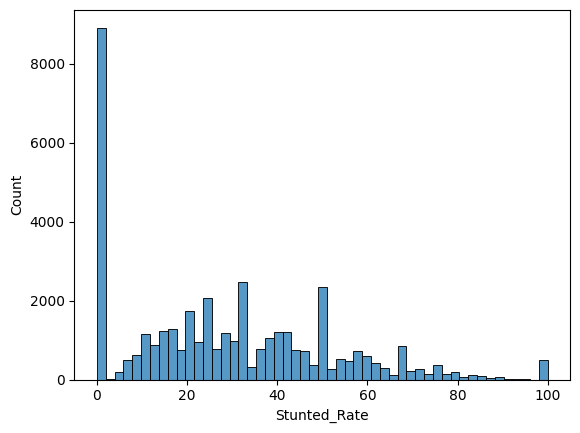

In [15]:
# make histogram of y
sns.histplot(y)

In [16]:
df1

,Es_min_max@CAS/IGSNRR/PML/V2&timestamped,basic_demographic_characteristics_min_max@CIESIN/GPWv411/GPW_Basic_Demographic_Characteristics&timestamped,national_identifier_grid@CIESIN/GPWv411/GPW_National_Identifier_Grid,national_identifier_grid_max@CIESIN/GPWv411/GPW_National_Identifier_Grid,national_identifier_grid_min@CIESIN/GPWv411/GPW_National_Identifier_Grid,urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped,SO2_column_number_density_15km_max_max@COPERNICUS/S5P/NRTI/L3_SO2&timestamped,solar_azimuth_angle_max_max@COPERNICUS/S5P/NRTI/L3_SO2&timestamped,ozone_tropospheric_mixing_ratio_median@COPERNICUS/S5P/OFFL/L3_O3_TCL&timestamped,ozone_tropospheric_vertical_column_median@COPERNICUS/S5P/OFFL/L3_O3_TCL&timestamped,...,onehotencoder__DHSCC_ET,onehotencoder__DHSCC_HT,onehotencoder__DHSCC_MZ,onehotencoder__DHSCC_TZ,onehotencoder__URBAN_RURA_R,onehotencoder__URBAN_RURA_U,remainder__DHSYEAR,remainder__LATNUM,remainder__LONGNUM,Stunted_Rate
DHSID,,,,,,,,,,,,,,,,,,,,,
AL200800000001,0.079005,0.533688,8.0,8,8,15.942918,0.001929,179.557310,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.822650,19.838322,20.00
AL200800000002,0.090663,0.165650,8.0,8,8,1.059678,0.001774,179.592150,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.696846,20.007555,0.00
AL200800000004,0.085710,0.814697,8.0,8,8,10.031118,0.001929,179.768220,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.798930,19.863338,0.00
AL200800000006,0.106758,8.941482,8.0,8,8,47.696820,0.001770,179.742550,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,40.711350,19.935308,0.00
AL200800000010,0.105490,8.942595,8.0,8,8,22.716291,0.001986,179.742550,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,40.698520,19.950300,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW201500000395,0.007476,0.000000,716.0,716,716,0.000000,0.000404,-18.019940,51.753593,0.011510,...,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,-17.166506,29.718370,21.74
ZW201500000396,0.002424,0.000000,716.0,716,716,80.522360,0.000402,-17.357134,53.740124,0.011052,...,0.0,0.0,0.0,0.0,0.0,1.0,2015.0,-17.915289,31.156115,25.00
ZW201500000397,0.038481,0.000000,716.0,716,716,0.298818,0.000336,-16.403381,53.757790,0.010933,...,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,-18.379501,31.872288,22.22


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# poly = PolynomialFeatures(degree=3, include_bias=False)
# poly_features = poly.fit_transform(X_train)
# poly_reg_model = LinearRegression()
# poly_reg_model.fit(poly_features, y_train)

# y_pred = poly_reg_model.predict(poly.transform(X_test))
# print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = SVR()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score:  23.18537495104309


In [35]:
# estimators = [
#     ('gbr', GradientBoostingRegressor(random_state=42)),
#     ('br', BaggingRegressor(random_state=42))
# ]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(random_state=42))
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model1 = RandomForestRegressor(random_state=42)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_train)
y2 = y_train - pred1

In [19]:
model2 = lgb.LGBMRegressor(random_state=42)
model2.fit(X_train, y2)
pred2 = model2.predict(X_train)
y3 = y2 - pred2

In [20]:
pred2

array([-0.24600346, -0.09670684,  1.02659346, ...,  1.09428472,
        1.73912264,  0.16196183])

In [21]:
model3 = xgb.XGBRegressor(random_state=42)
model3.fit(X_train, y3)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [22]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

pred = pred1 + pred2 + pred3
print("RMSE score: ", np.sqrt(mean_squared_error(y_test, pred)))

RMSE score:  19.32782655832753


In [45]:
estimators = [
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('br', BaggingRegressor(random_state=42)),
    ('rfr', RandomForestRegressor(n_estimators=2000, max_features=0.4, random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42))
]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = VotingRegressor(estimators=estimators)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score:  18.948268365590316


In [17]:
estimators = [
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('br', BaggingRegressor(random_state=42)),
    ('rfr', RandomForestRegressor(n_estimators=2000, max_features=0.4, random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42))
]

model = VotingRegressor(estimators=estimators, n_jobs=-1)
model.fit(X, y)

VotingRegressor(estimators=[('gbr', GradientBoostingRegressor(random_state=42)),
                            ('br', BaggingRegressor(random_state=42)),
                            ('rfr',
                             RandomForestRegressor(max_features=0.4,
                                                   n_estimators=2000,
                                                   random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_ro...
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...))],
                n_jobs=-1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = BayesianRidge(n_iter=5000, alpha_1=0.001, alpha_2=0.001, verbose=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Convergence after  7  iterations
RMSE score:  20.336398360658478


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE score: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE score:  19.274830813093075


<AxesSubplot: xlabel='remainder__LONGNUM', ylabel='Stunted_Rate'>

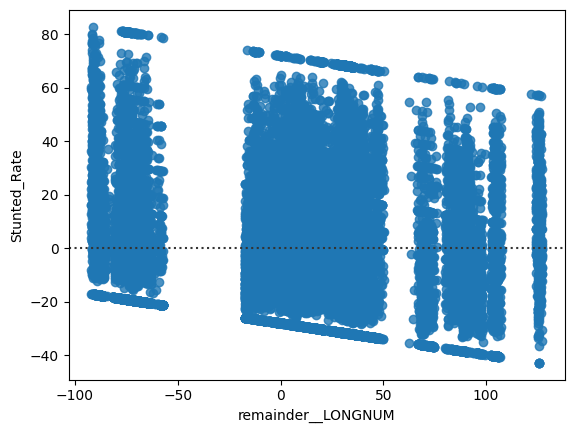

In [36]:
sns.residplot(data=df1, y='Stunted_Rate', x='remainder__LONGNUM')

In [28]:
# make a plot between y_pred and y_test
# y_pred is the predicted value of the model
# y_test is the actual value of the model
# mark y_pred with red and y_test with blue
# x axis is the index of the data
# y axis is the value of the data
# title is the name of the model
# save the plot in the folder: plots/column_wise_models
# file name is the name of the model
# return the plot
def plot(y_pred, y_test, model_name):
    plt.plot(y_pred, 'r')
    plt.plot(y_test, 'b')
    plt.title(model_name)
    plt.xlim(0, 500)
    plt.figsize=(500, 100)
    plt.savefig(model_name+'.png')
    plt.clf()
    return plt

plot(y_pred, y_test, 'stunted_rate')

<module 'matplotlib.pyplot' from '/opt/miniconda3/envs/ml2/lib/python3.10/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

In [18]:
sub = pd.read_csv(submission_path, index_col='DHSID')
df2 = df.drop(columns=[col_name])
test = sub.join(df2, how='left')
test.drop(columns=pred_cols, inplace=True)
test

,Es_min_max@CAS/IGSNRR/PML/V2&timestamped,basic_demographic_characteristics_min_max@CIESIN/GPWv411/GPW_Basic_Demographic_Characteristics&timestamped,national_identifier_grid@CIESIN/GPWv411/GPW_National_Identifier_Grid,national_identifier_grid_max@CIESIN/GPWv411/GPW_National_Identifier_Grid,national_identifier_grid_min@CIESIN/GPWv411/GPW_National_Identifier_Grid,urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped,SO2_column_number_density_15km_max_max@COPERNICUS/S5P/NRTI/L3_SO2&timestamped,solar_azimuth_angle_max_max@COPERNICUS/S5P/NRTI/L3_SO2&timestamped,ozone_tropospheric_mixing_ratio_median@COPERNICUS/S5P/OFFL/L3_O3_TCL&timestamped,ozone_tropospheric_vertical_column_median@COPERNICUS/S5P/OFFL/L3_O3_TCL&timestamped,...,onehotencoder__DHSCC_DR,onehotencoder__DHSCC_ET,onehotencoder__DHSCC_HT,onehotencoder__DHSCC_MZ,onehotencoder__DHSCC_TZ,onehotencoder__URBAN_RURA_R,onehotencoder__URBAN_RURA_U,remainder__DHSYEAR,remainder__LATNUM,remainder__LONGNUM
DHSID,,,,,,,,,,,,,,,,,,,,,
AL200800000003,0.103369,0.444329,8.00000,8.0,8.0,3.955272,0.001707,179.530600,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.750040,19.974262
AL200800000005,0.096352,0.541894,8.00000,8.0,8.0,0.901964,0.001859,179.618840,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.746124,19.843885
AL200800000007,0.098821,3.778325,8.00000,8.0,8.0,12.266235,0.001827,179.544780,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,40.701607,19.989952
AL200800000008,0.105989,8.942595,8.00000,8.0,8.0,50.352406,0.001986,179.544780,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,40.695984,19.965063
AL200800000009,0.101052,8.941481,8.00000,8.0,8.0,34.656734,0.001986,179.557740,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,40.698685,19.981623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW201500000382,0.012040,0.000000,716.00000,716.0,716.0,0.000000,0.000443,-15.686703,48.700848,0.010540,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,-19.939451,31.822948
ZW201500000383,0.000000,0.000000,716.00000,716.0,716.0,-1.000000,0.000312,-16.927180,49.692770,0.010532,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,-19.851952,28.240479
ZW201500000386,0.000000,0.000000,-19.36183,716.0,710.0,0.000000,0.000339,-16.038418,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,-22.126260,29.639608


In [19]:
# impute test values
imputer = KNNImputer(n_neighbors=75)
test = pd.DataFrame(imputer.fit_transform(test), columns=test.columns, index=test.index)
test

,Es_min_max@CAS/IGSNRR/PML/V2&timestamped,basic_demographic_characteristics_min_max@CIESIN/GPWv411/GPW_Basic_Demographic_Characteristics&timestamped,national_identifier_grid@CIESIN/GPWv411/GPW_National_Identifier_Grid,national_identifier_grid_max@CIESIN/GPWv411/GPW_National_Identifier_Grid,national_identifier_grid_min@CIESIN/GPWv411/GPW_National_Identifier_Grid,urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped,SO2_column_number_density_15km_max_max@COPERNICUS/S5P/NRTI/L3_SO2&timestamped,solar_azimuth_angle_max_max@COPERNICUS/S5P/NRTI/L3_SO2&timestamped,ozone_tropospheric_mixing_ratio_median@COPERNICUS/S5P/OFFL/L3_O3_TCL&timestamped,ozone_tropospheric_vertical_column_median@COPERNICUS/S5P/OFFL/L3_O3_TCL&timestamped,...,onehotencoder__DHSCC_DR,onehotencoder__DHSCC_ET,onehotencoder__DHSCC_HT,onehotencoder__DHSCC_MZ,onehotencoder__DHSCC_TZ,onehotencoder__URBAN_RURA_R,onehotencoder__URBAN_RURA_U,remainder__DHSYEAR,remainder__LATNUM,remainder__LONGNUM
DHSID,,,,,,,,,,,,,,,,,,,,,
AL200800000003,0.103369,0.444329,8.00000,8.0,8.0,3.955272,0.001707,179.530600,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.750040,19.974262
AL200800000005,0.096352,0.541894,8.00000,8.0,8.0,0.901964,0.001859,179.618840,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2008.0,40.746124,19.843885
AL200800000007,0.098821,3.778325,8.00000,8.0,8.0,12.266235,0.001827,179.544780,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,40.701607,19.989952
AL200800000008,0.105989,8.942595,8.00000,8.0,8.0,50.352406,0.001986,179.544780,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,40.695984,19.965063
AL200800000009,0.101052,8.941481,8.00000,8.0,8.0,34.656734,0.001986,179.557740,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,40.698685,19.981623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZW201500000382,0.012040,0.000000,716.00000,716.0,716.0,0.000000,0.000443,-15.686703,48.700848,0.010540,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,-19.939451,31.822948
ZW201500000383,0.000000,0.000000,716.00000,716.0,716.0,-1.000000,0.000312,-16.927180,49.692770,0.010532,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,-19.851952,28.240479
ZW201500000386,0.000000,0.000000,-19.36183,716.0,710.0,0.000000,0.000339,-16.038418,21.800858,-0.994597,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,-22.126260,29.639608


In [ ]:
test.to_csv('../../data/test_imputed.csv', index=False)

In [20]:
pred = model.predict(test)

In [22]:
pred

array([31.77536595, 24.03192046, 13.93573459, ..., 26.72641458,
       20.47586811, 22.16923537])

In [24]:
submission = pd.read_csv('~/Downloads/best_sub.csv')
submission[col_name] = submission[col_name] * 0.45 + pred * 0.55
submission.to_csv('~/Downloads/ensemble.csv', index=False)

In [21]:
submission

,DHSID,Mean_BMI,Median_BMI,Unmet_Need_Rate,Under5_Mortality_Rate,Skilled_Birth_Attendant_Rate,Stunted_Rate
0,AL200800000003,24.863690,24.274328,17.157884,4.754666,88.360444,28.383329
1,AL200800000005,24.818336,24.241997,21.598627,4.552774,81.070858,21.968664
2,AL200800000007,25.010856,24.541206,15.170918,5.578971,79.852158,13.259852
3,AL200800000008,25.021574,24.547308,14.315952,6.995465,75.345256,9.358983
4,AL200800000009,25.029746,24.589427,14.644387,7.049071,75.244362,9.543714
...,...,...,...,...,...,...,...
14995,ZW201500000382,23.772492,23.011540,18.262649,6.881537,72.655213,30.814820
14996,ZW201500000383,24.072374,23.527719,18.510457,5.811968,81.067848,26.802786
14997,ZW201500000386,24.991068,24.640301,26.445624,6.233930,80.728863,26.715751
14998,ZW201500000390,25.623299,24.713543,10.284504,5.365524,93.546687,20.604001
